#### Lab 7.8.3 - General Additive Models 

#### Import block

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

from pygam import LinearGAM, s, f, l

Import data

In [10]:
data_path = 'D:\\PycharmProjects\\ISLR\\data\\'
df = pd.read_csv(f'{data_path}Wage.csv', )

To run GAMs, I used the pygam package [here](https://pygam.readthedocs.io/en/latest/notebooks/tour_of_pygam.html#API)

Notice the lambda here is predetermined and not specified. 

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
d:\pycharmprojects\islr\venv\lib\site-packages\ipykernel_launcher.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     19.2602
Link Function:                     IdentityLink Log Likelihood:                                -24116.7451
Number of Samples:                         3000 AIC:                                            48274.0107
                                                AICc:                                           48274.2999
                                                GCV:                                             1250.3656
                                                Scale:                                           1235.9245
                                                Pseudo R-Squared:                                   0.2945
Feature Function                  Lam

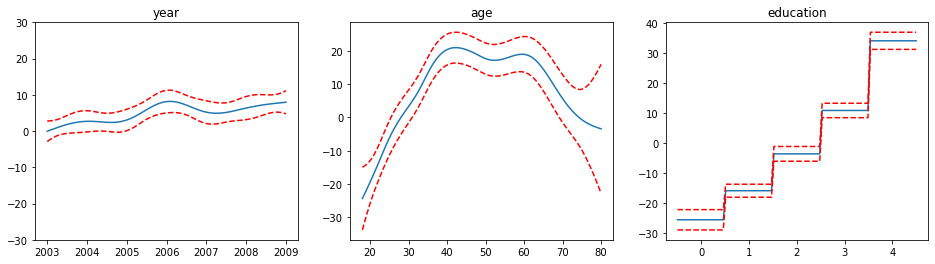

In [21]:
from pygam.datasets import wage
X, y = wage()

gam = LinearGAM(s(0) + s(1) + f(2))
gam.gridsearch(X, y)

# plotting
fig, axs = plt.subplots(1,3, figsize=(16,4))

titles = ['year', 'age', 'education']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])

gam.summary()

Unfortunately, LinearGAM does not have ssr object which is required to run anova

Nevertheless, we can still use pygam module Logistic gam to fit logistic regression

#### LogisticGAM